# Avocado Data Analysis

## Data Understanding

- The [Avocado dataset](https://www.kaggle.com/neuromusic/avocado-prices) was been used in this project.

- This dataset contains 13 columns:
    1. Date - The date of the observation
    2. AveragePrice: the average price of a single avocado
    3. Total Volume: Total number of avocados sold
    4. Total Bags: Total number  o bags
    5. Small Bags: Total number of Small bags
    6. Large Bags: Total number of Large bags
    7. XLarge Bags: Total number of XLarge bags
    8. type: conventional or organic
    9. year: the year
    10. region: the city or region of the observation
    11. 4046: Total number of avocados with PLU 4046 sold
    12. 4225: Total number of avocados with PLU 4225 sold
    13. 4770: Total number of avocados with PLU 4770 sold

## Business Understanding

- The goal of this project is to analyze and forecast avocado prices and production trends across different regions:

    1. Which region are the lowest and highest prices of Avocado?
    2. What is the highest region of avocado production?
    3. What is the average avocado prices in each year?
    4. What is the average avocado volume in each year?

In [53]:
# Import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, PoissonRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

import warnings
warnings.filterwarnings('ignore')

## Data Anaysis

In [54]:
# load dataset
ds = pd.read_csv(r'C:\Users\USER\Desktop\Resume Project\AVOCADO PRICE PREDICTION\avocado.csv')
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [55]:
ds.shape

(18249, 14)

In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [57]:
ds.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [58]:
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [59]:
ds.values

array([[0, '2015-12-27', 1.33, ..., 'conventional', 2015, 'Albany'],
       [1, '2015-12-20', 1.35, ..., 'conventional', 2015, 'Albany'],
       [2, '2015-12-13', 0.93, ..., 'conventional', 2015, 'Albany'],
       ...,
       [9, '2018-01-21', 1.87, ..., 'organic', 2018, 'WestTexNewMexico'],
       [10, '2018-01-14', 1.93, ..., 'organic', 2018, 'WestTexNewMexico'],
       [11, '2018-01-07', 1.62, ..., 'organic', 2018, 'WestTexNewMexico']],
      dtype=object)

In [60]:
# let's check for duplicate values
ds.duplicated().values.any()

False

In [61]:
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [62]:
ds['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [63]:
ds['region'].nunique()

54

In [64]:
# filter out subtotals (total us, west, midsouth, northeast, south central and southeast)
# because these are not individual cities or markets, but regional or national subtotal values.

ds = ds.loc[ds['region'] != 'Total U.S.']
ds = ds.loc[ds['region'] != 'Northeast']
ds = ds.loc[ds['region'] != 'Midsouth']
ds = ds.loc[ds['region'] != 'South Central']
ds = ds.loc[ds['region'] != 'Southeast']
ds = ds.loc[ds['region'] != 'West']

In [65]:
ds['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle',
       'SouthCarolina', 'SouthCentral', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'WestTexNewMexico'], dtype=object)

In [66]:
ds['region'].nunique()

50

In [67]:
ds.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [68]:
# code to convert from object to datetime
ds['Date'] = pd.to_datetime(ds['Date'])

In [69]:
ds.drop(['Unnamed: 0', '4046', '4225', '4770'], axis=1, inplace=True)

In [70]:
ds.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [71]:
ds.shape

(16897, 10)

## Data Visualization With Insight Generation

In [72]:
def get_avarage(ds,column):
    """
    Description: This function to return the average value of the column 

    Arguments:
        ds: the DataFrame. 
        column: the selected column. 
    Returns:
        column's average 
    """
    return sum(ds[column])/len(ds)

In [73]:
def get_avarge_between_two_columns(ds,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(ds[column1].unique())
    average=[]

    for i in List:
        x=ds[ds[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    ds_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=ds_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=ds_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [74]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

### 1. Which region are the lowest and highest prices of Avocado?

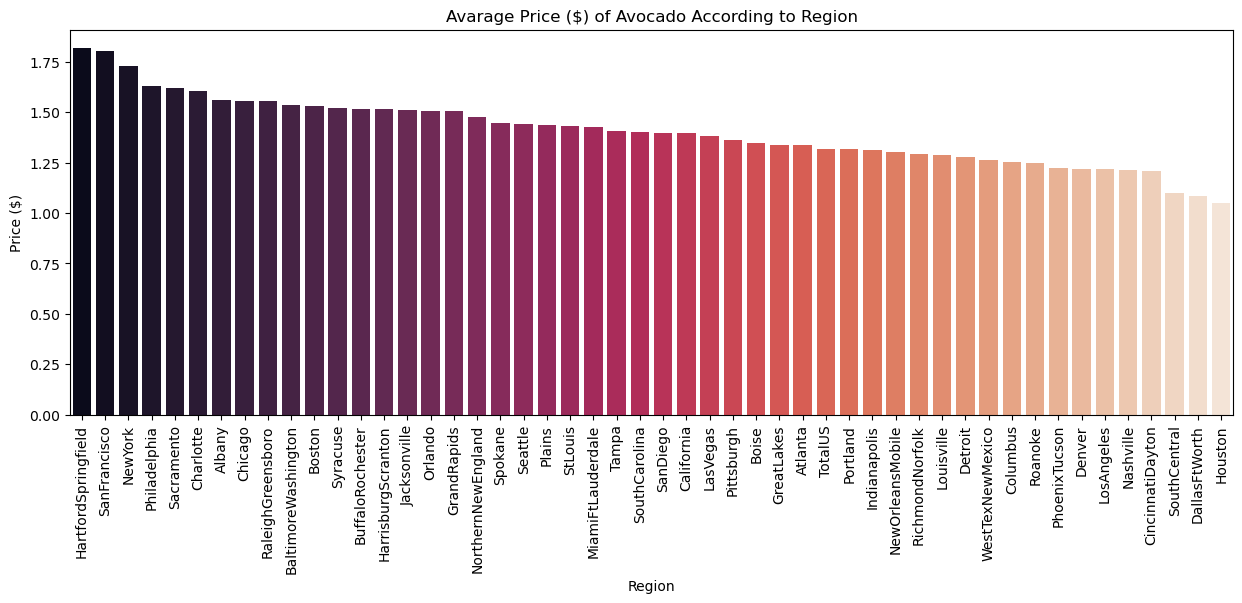

In [75]:
data1 = get_avarge_between_two_columns(ds,'region','AveragePrice')
plot(data1,'Region','Price ($)')

- Hartfordspringfield is region producing avocado with the highest price.
- Houston is region producing avocado with the lowest price.

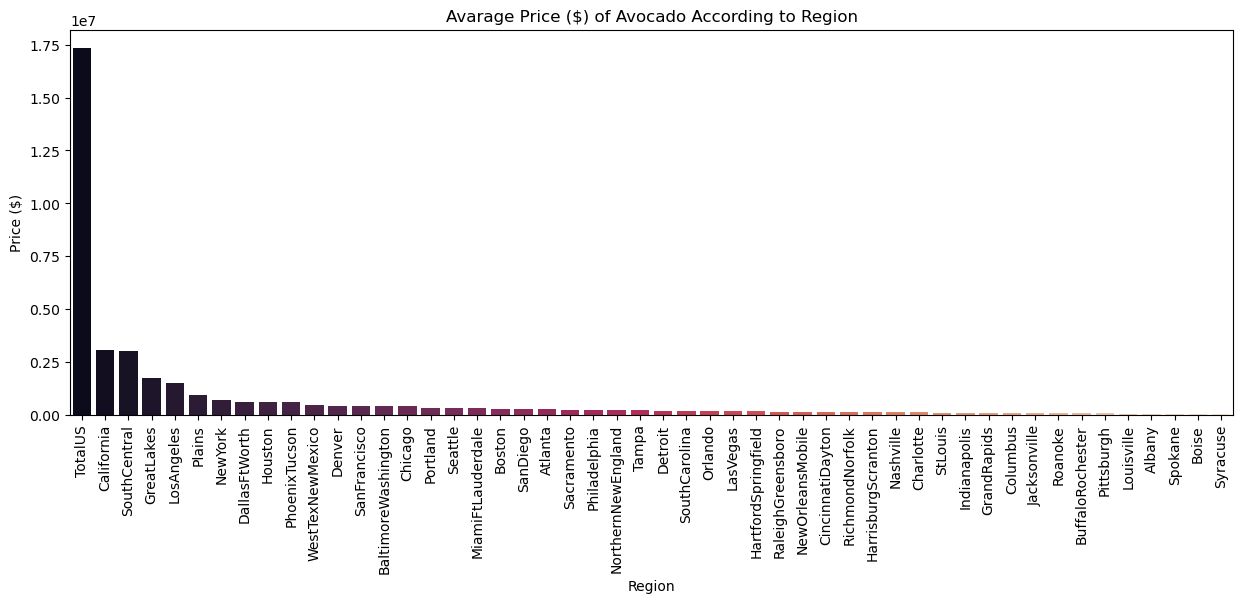

In [76]:
data1 = get_avarge_between_two_columns(ds,'region', 'Total Volume')
plot(data1,'Region','Price ($)')

### 2. What is the highest region of avocado production?

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

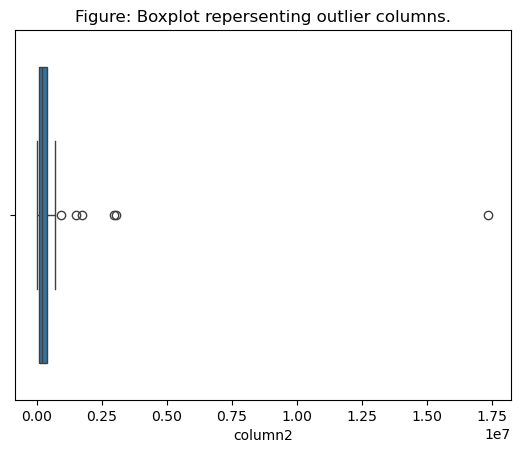

In [77]:
data2 = get_avarge_between_two_columns(ds,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")
# there is an outlier in column

In [78]:
# to find column have outlier 
# print column name have value more than 10000000  [1.75 × 10⁷ (17,500,000)]
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [79]:
# drop column having outlier
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

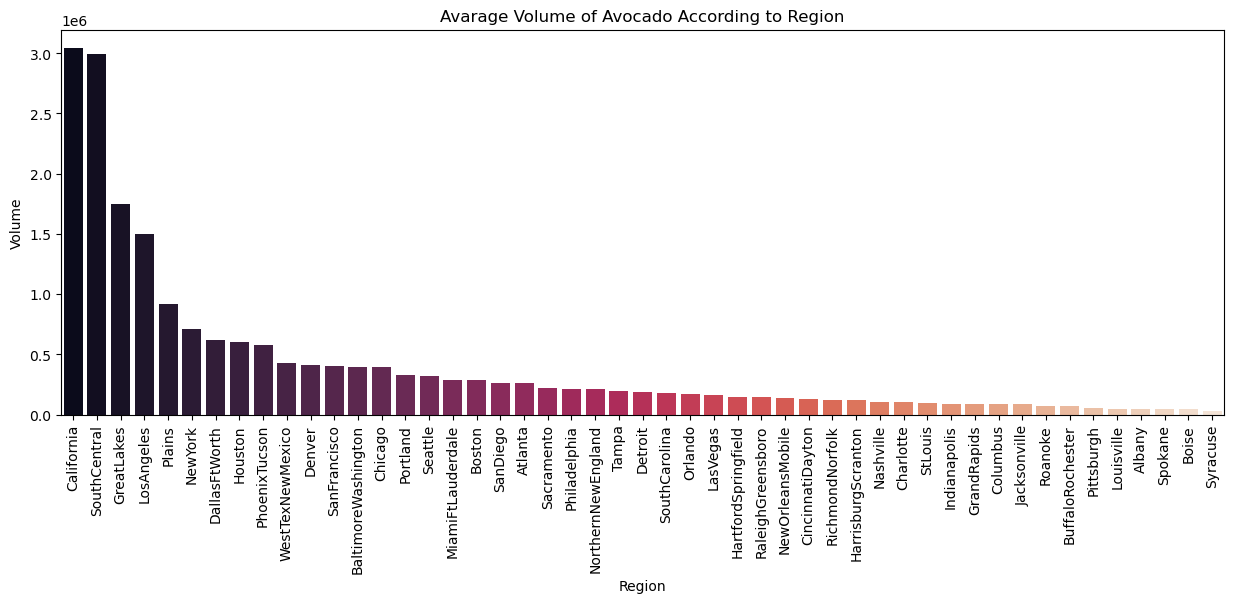

In [80]:
plot(data2,'Region','Volume')

### 3. What is the average avocado prices in each year?

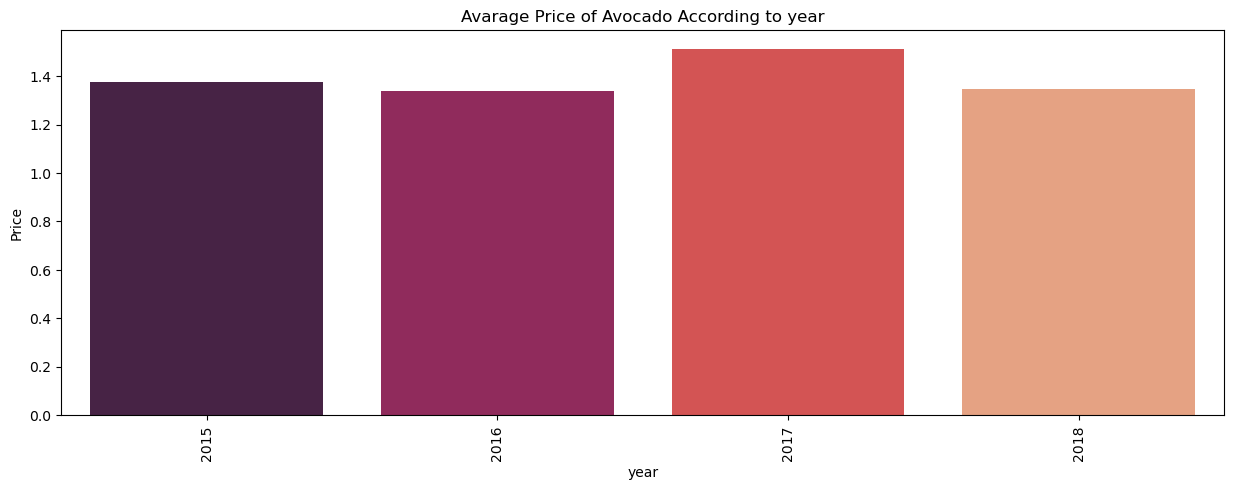

In [81]:
data3 = get_avarge_between_two_columns(ds,'year','AveragePrice')
plot(data3,'year','Price')

### 4. What is the average avocado volume in each year?

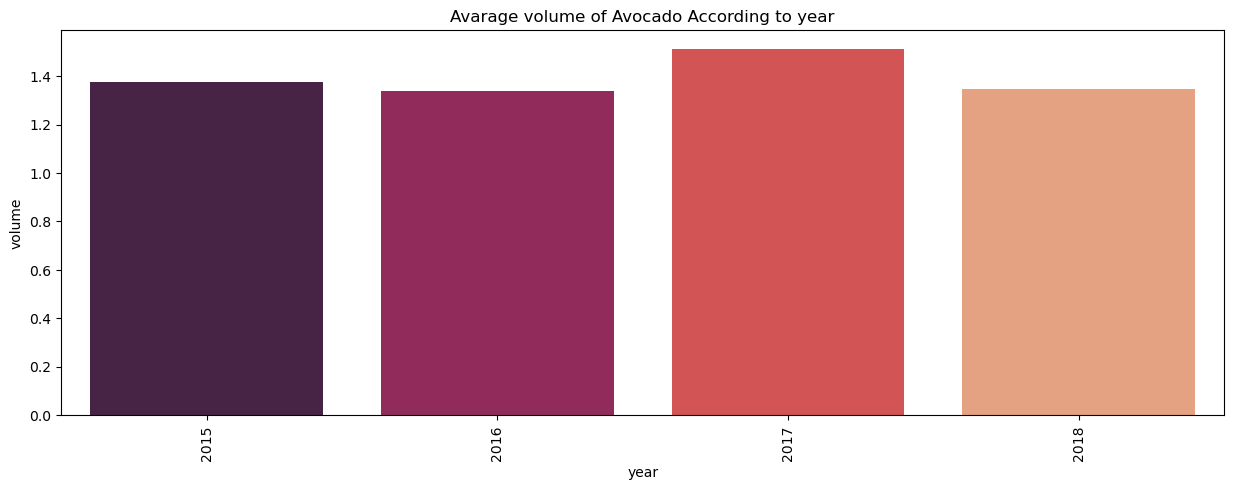

In [82]:
data4 = get_avarge_between_two_columns(ds,'year','Total Volume')
plot(data3,'year','volume')

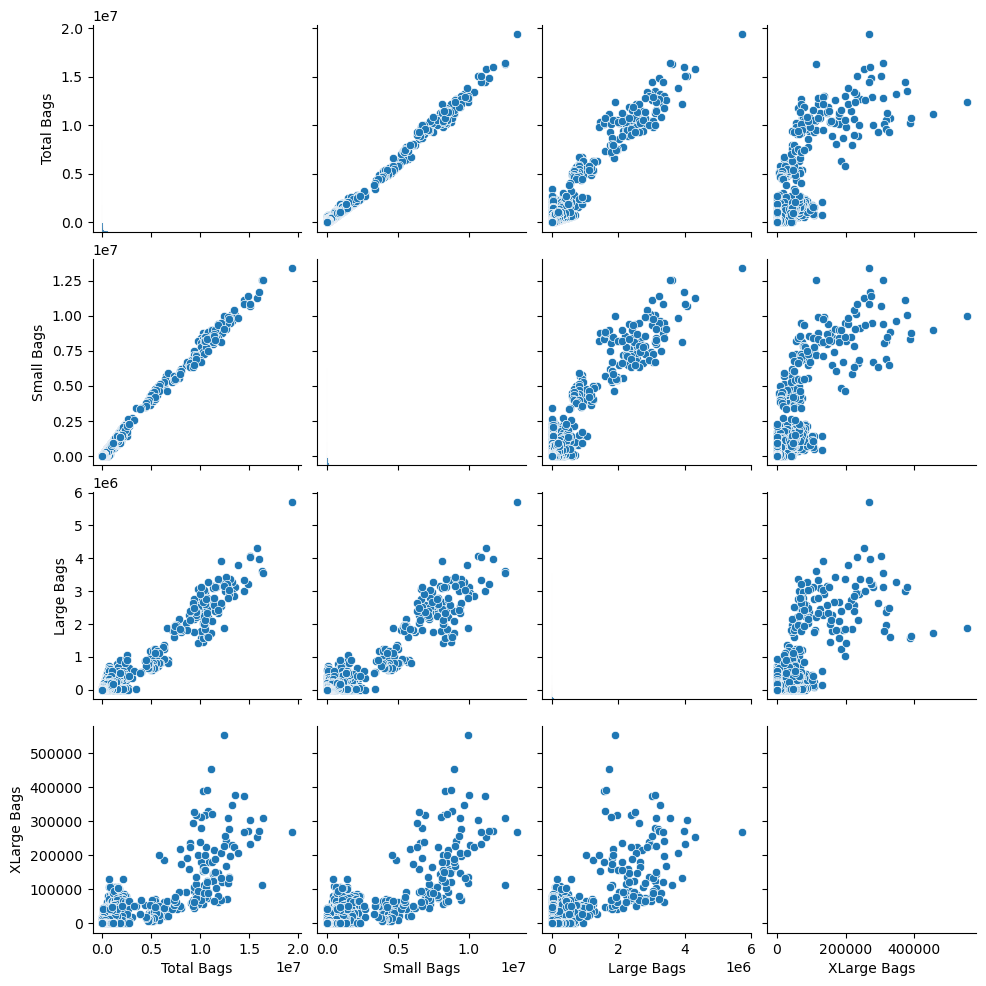

In [83]:

sns.pairplot(ds[['Total Bags','Small Bags','Large Bags','XLarge Bags']])
plt.show()


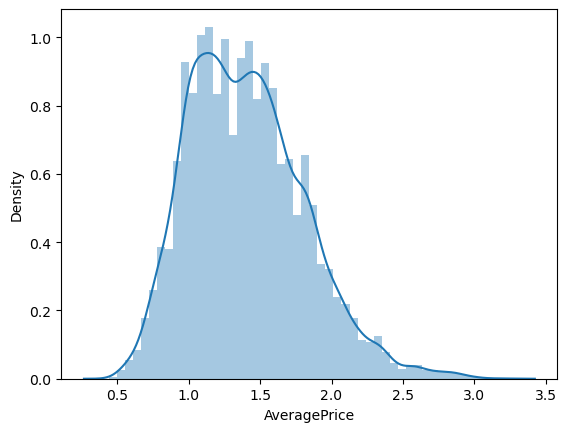

In [84]:
sns.distplot(ds['AveragePrice']);

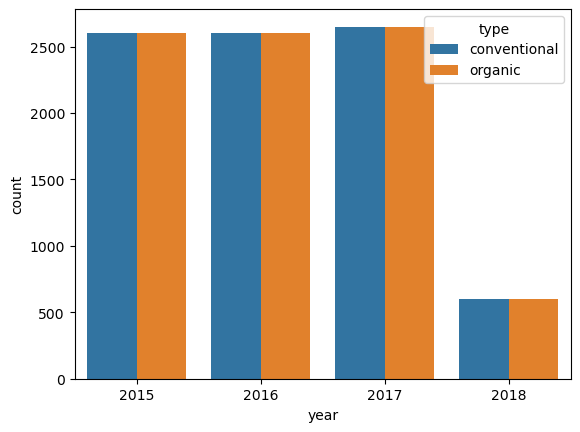

In [85]:
sns.countplot(x='year',data=ds,hue='type');

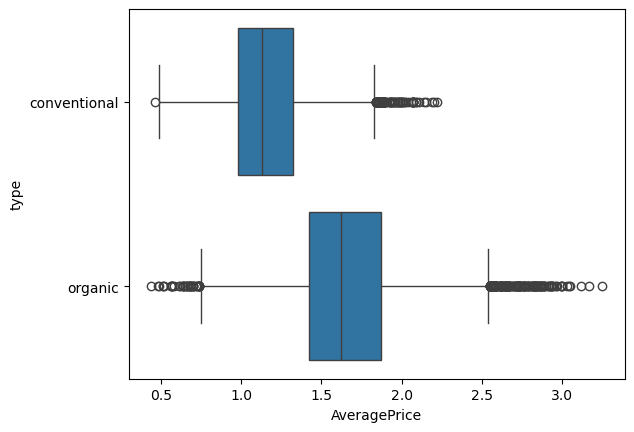

In [86]:
sns.boxplot(y="type", x="AveragePrice", data=ds);

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

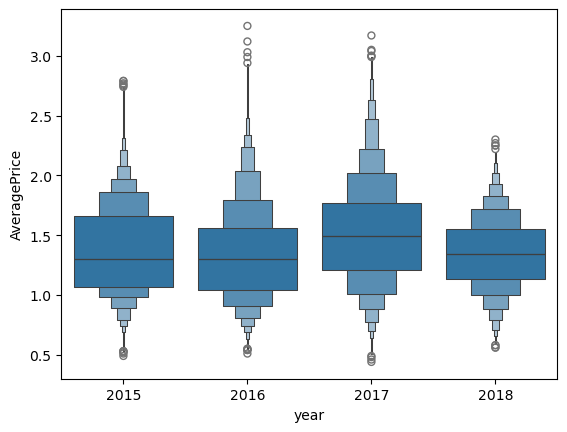

In [87]:
ds.year=ds.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=ds);

Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

In [88]:
# Converting date to month for better accuracy
ds['Date'] = pd.to_datetime(ds['Date'])       # Ensure datetime format
ds['Month'] = ds['Date'].dt.month_name()      # Get full month name
ds['Month'] = ds['Date'].dt.strftime('%b')

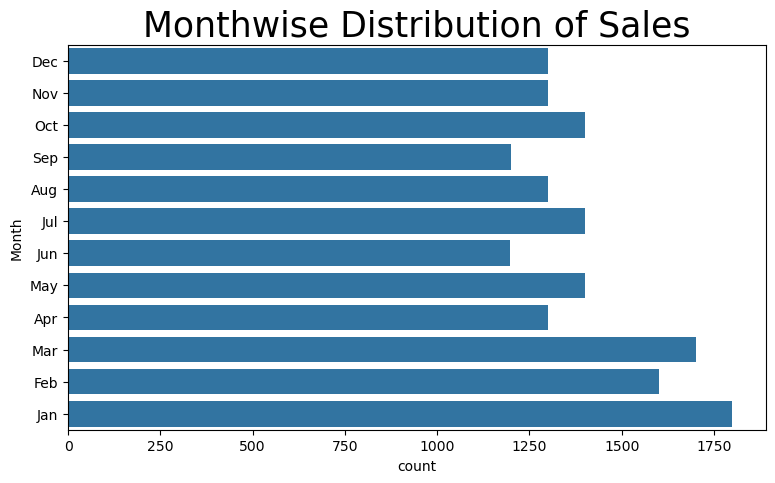

In [89]:
plt.figure(figsize=(9,5))
sns.countplot(ds['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [90]:
ds.groupby(by=["region","type","year"]).mean(numeric_only=True).style.background_gradient(axis=0,cmap="turbo")

## Model Building

In [91]:
ds.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                    object
region                  object
Month                   object
dtype: object

In [92]:
# Type convertion of object to int & categrical 
ds['year'] = ds['year'].astype(int)
ds['region'] = ds['region'].astype('category')
ds['type'] = ds['region'].astype('category')

In [93]:
# Remove unwanted feature
ds.drop(['Date','Total Bags','Month'],axis=1, inplace=True)

In [94]:
ds.dtypes

AveragePrice     float64
Total Volume     float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type            category
year               int32
region          category
dtype: object

In [95]:
ds.head()

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8603.62,93.25,0.0,Albany,2015,Albany
1,1.35,54876.98,9408.07,97.49,0.0,Albany,2015,Albany
2,0.93,118220.22,8042.21,103.14,0.0,Albany,2015,Albany
3,1.08,78992.15,5677.40,133.76,0.0,Albany,2015,Albany
4,1.28,51039.60,5986.26,197.69,0.0,Albany,2015,Albany


In [96]:
# Encoding categrical to neumerical 
ds = pd.get_dummies(ds, columns=['type', 'region',], drop_first=True)

In [97]:
# Spliting data in x & y
X = ds.drop('AveragePrice', axis=1)
y = ds['AveragePrice']

In [98]:
# Training data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
# Select model to train data
models = {
    'Linear' : LinearRegression(),
    'L1' : Lasso(),
    'L2' : Ridge(),
    'Dtree' : DecisionTreeRegressor(),
    'Random' : RandomForestRegressor(),
    'KNN' : KNeighborsRegressor(),
    'svr' : SVR(),
    'lgbm' : LGBMRegressor(),
    'xgboost' : XGBRegressor()
    }

In [100]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 13517, number of used features: 103
[LightGBM] [Info] Start training from score 1.407181


In [101]:
results_df = pd.DataFrame(results)
results_df.to_csv('model_evaluation_results.csv', index=False)
print(results_df)

     Model       MAE       MSE        R2
0   Linear  0.289568  0.128520  0.205732
1       L1  0.317440  0.156949  0.030037
2       L2  0.289659  0.128586  0.205324
3    Dtree  0.136405  0.041991  0.740489
4   Random  0.111214  0.025928  0.839764
5      KNN  0.209641  0.079209  0.510482
6      svr  0.256021  0.110846  0.314963
7     lgbm  0.135084  0.032740  0.797666
8  xgboost  0.119555  0.026850  0.834062


In [ ]:
# List of models to pickle
models_to_pickle = ['lgbm', 'xgboost', 'Random']

# Loop through and pickle the already trained models
for model_name in models_to_pickle:
    trained_model = models[model_name]  # Already trained
    filename = f"{model_name}_model.pkl"
    
    with open(filename, 'wb') as file:
        pickle.dump(trained_model, file)
    
    print(f"{model_name} saved successfully as {filename}")


lgbm saved successfully as lgbm_model.pkl
xgboost saved successfully as xgboost_model.pkl
Random saved successfully as Random_model.pkl


In [ ]:
# --- Save columns which are categrical ---
pickle.dump(X.columns, open("columns.pkl", "wb"))
print("Columns saved for future encoding")


Columns saved for future encoding


## Conclusion:

- Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
- For this dataset, Random Forest , XGBoost, LGBM algorithms have shown best results with Lowest Error & Best Fit line (R² score) .